In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\modyr\Desktop\Youtube Analysis\Youtube_Data_Analysis\yt_data.csv')

df.head(2)

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02T06:35:42Z,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2432484,23612,0,0,6670
1,mS8W6NY6QjQ,FULL SEGMENT: John Cena SELLS OUT and ruthless...,After Undisputed WWE Champion Cody Rhodes emph...,2025-03-02T05:03:43Z,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,17,"['Cody Rhodes', 'John Cena', 'The Rock', 'Trav...",PT17M23S,hd,True,3633776,135387,0,0,23401


In [2]:
top_commented_videos = df.pivot_table(index='title', 
                                      values='comment_count'
                                      ).sort_values(by='comment_count', 
                                                    ascending=False).head(10)

top_commented_videos

,comment_count
title,
Kendrick Lamar's Apple Music Super Bowl Halftime Show,175269.0
I Spent 100 Hours Inside The Pyramids!,92363.0
"JENNIE, Doechii - ExtraL (Official Video)",86689.0
LISA - FUTW (Vixi Solo Version) (Official Music Video),73703.0
IS THIS THE BEST BRAWLER EVER?!,53964.0
Hearts2Hearts 하츠투하츠 'The Chase' MV,44787.0
G-DRAGON - TOO BAD (feat. Anderson .Paak) (Official Video),40101.0
"100 People Trapped Inside 100 Circles For $500,000",33320.0
G-DRAGON - DRAMA (Official Video),30907.0


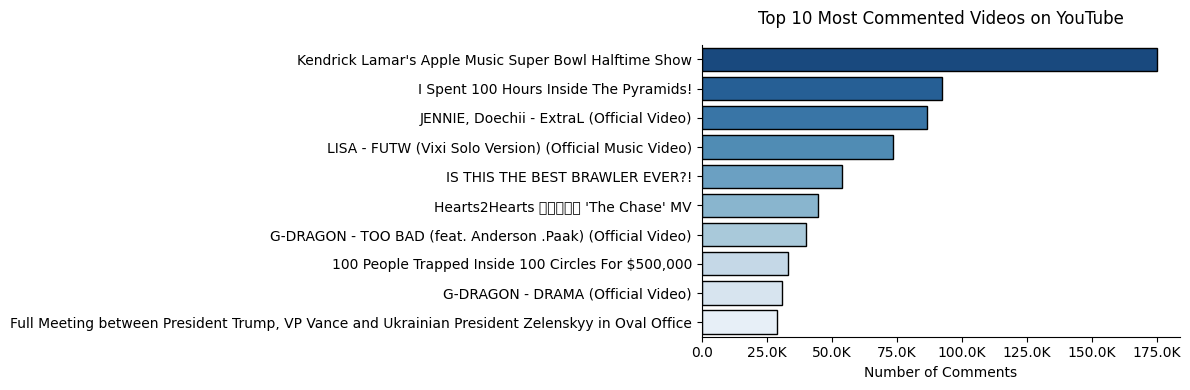

In [5]:
plt.figure(figsize=(12, 4))
sns.barplot(data=top_commented_videos,
            x='comment_count',
            y='title',
            palette='Blues_r',
            edgecolor='black'
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title("Top 10 Most Commented Videos on YouTube", pad=15)
plt.xlabel("Number of Comments")
plt.ylabel('')

sns.despine()
plt.tight_layout()
plt.show()

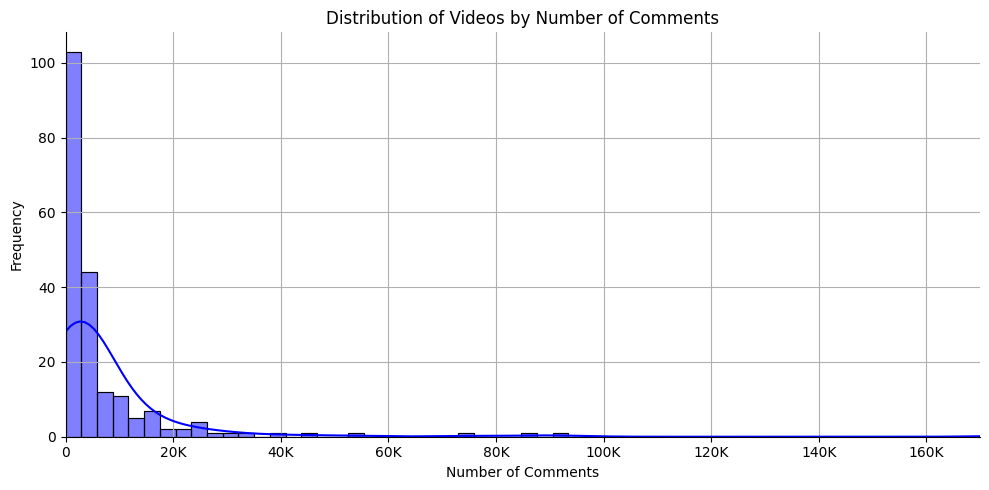

In [4]:
# videos distribution by comment
plt.figure(figsize=(10, 5))

sns.histplot(data=df,
             x='comment_count',
             bins=60,
             kde=True,
             palette='Blues_r',
             color='blue'
             
)

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Comments')
plt.ylabel('Frequency')
plt.xlabel('Number of Comments')

plt.grid(True)
plt.xlim(0, 170000)
sns.despine()
plt.tight_layout()
plt.show()